# Concrete Strength Based on Components
## By: Mason Nolan

---

In [ ]:
import pandas as pd # Import all necessary packages for our project
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.stats.diagnostic import het_breuschpagan
import scipy.stats as stats

# Introduction

Concrete is necessarily required to be incredibly durable, as it is intended to be used as construction material and will need to support enormous amounts of stress, whether that be load-bearing buildings, wear and tear from being run over by vehicles, or sidewalks that will endure harsh weather conditions. Material designers would benefit to find the optimal recipe for concrete that offers the best strength rating in order to produce premium concrete that may be more suitable for daring projects, or just ensuring a project will be built to last. We will investigate a dataset that contains various concrete samples from hundreds of potential recipes and mixtures, in our to find the concrete that is given the highest strength rating (compressive strength, measured in megapascals).

The full list of predictive features are cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, fine aggregate (all measured in kg/m^3), and age in days (time the concrete is left to settle) for a total of 8 predictive features and one target variable: the target is our concrete's compressive strength measured in MPa. Our dataset can be previewed here:



In [ ]:
concrete_raw = pd.read_excel("Concrete_Data.xls")
concrete_raw

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [ ]:
concrete_raw.duplicated().value_counts().to_string()

'False    1005\nTrue       25'

In [ ]:
concrete_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

We see that our data contains no missing values, so we do not need to impute values or delete rows that contain missing information. All of our features are also numerical, so no categorical encoding needs to be done (note that age is measured discretely though, rather than continuously). We do find that we have duplicate rows, however, indicating that some entries may have erroneously been entered more than once. We will delete duplicate rows to address this error, and our total sample size will then be $n=1005$.

In [ ]:
concrete = concrete_raw.drop_duplicates()

It is likely going to be the case that some of our materials show diminishing returns when an increase in the material is added, or perhaps age shows diminishing returns (which makes sense, since we would not expect a concrete to perpetually get harder over time after it has completely finished settling). For this reason, the model we are going to use to predict the concrete strength will be a multiple linear model, but we will expect to transform some of the predictive features to be a better fit for our model. To determine which features may need to be transformed, we will plot each feature against the target and see if a pattern emerges.

We will verify our linear regression assumptions statistically and graphically. We are assuming that we have linear relationships, that our error terms are normally distributed, independant, and that we have constant variance. We will plot residuals once the model is created to visualize if the variance is non-constant. We do not need to check for outliers, each potential mixture of concrete is a viable mixture and we do not have material specialists testing absurd concoctions. Feature correlation will be demonstrated by a correlation matrix, thought we would only expect correlation if some ingredients necessarily required parts of another ingredient to form a stable compound. Feature importance will show us which ingredients in particular are most fundamental for forming strong concrete, or which ingredients may be unnecessary.

## Data Analysis

We start by viewing our correlation matrix to see if there is any relationships between our features, which may indicate that some ingredients may require a proportion of another ingredient in order to be a viable ingredient in concrete.

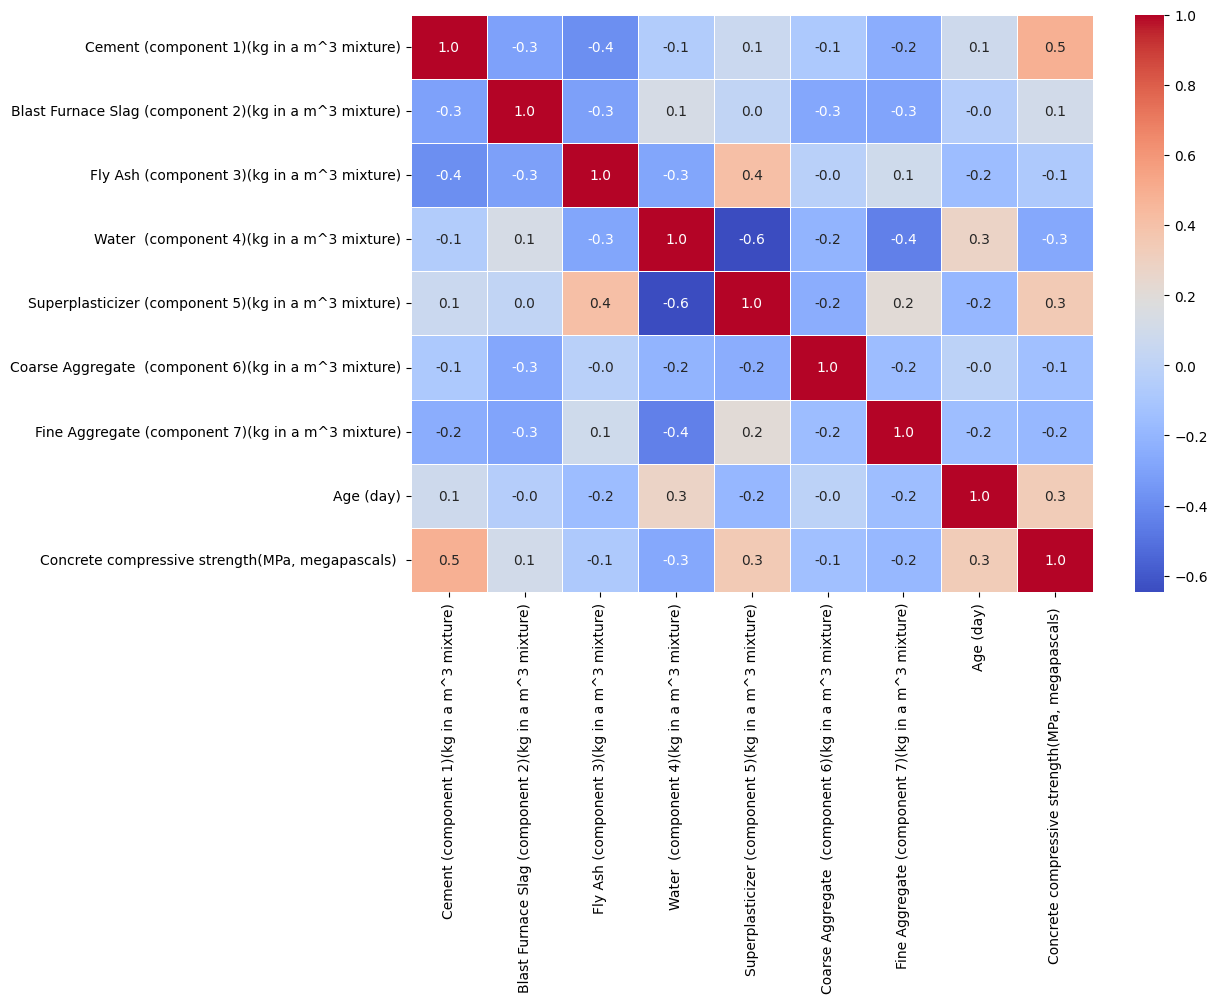

In [ ]:
plt.figure(figsize=(11,7.5))
sns.heatmap(concrete.corr(), annot=True, linewidths=.5, fmt= '.1f', cmap="coolwarm")
plt.show()

We see no particular correlations of enormous degree, though we do see that water and superplasticizer have the highest degree of negative correlation. This most likely indicates that these ingredients may serve a similar purpose in the concrete recipe, and we choose to use mostly one or the other in a recipe. In fact, superplasticizer are additives in concrete that specifically exist to allow concrete to be made with low water volume, so this aligns with our observation in the correlation matrix. Additionally, cement shows the highest correlation with compressive strength, forecasting that cement will likely be one of the most important features for improving cement strength, but that will be verified by our model and investigating feature importance. We still need to check if our features need to be transforming before creating any models, however.

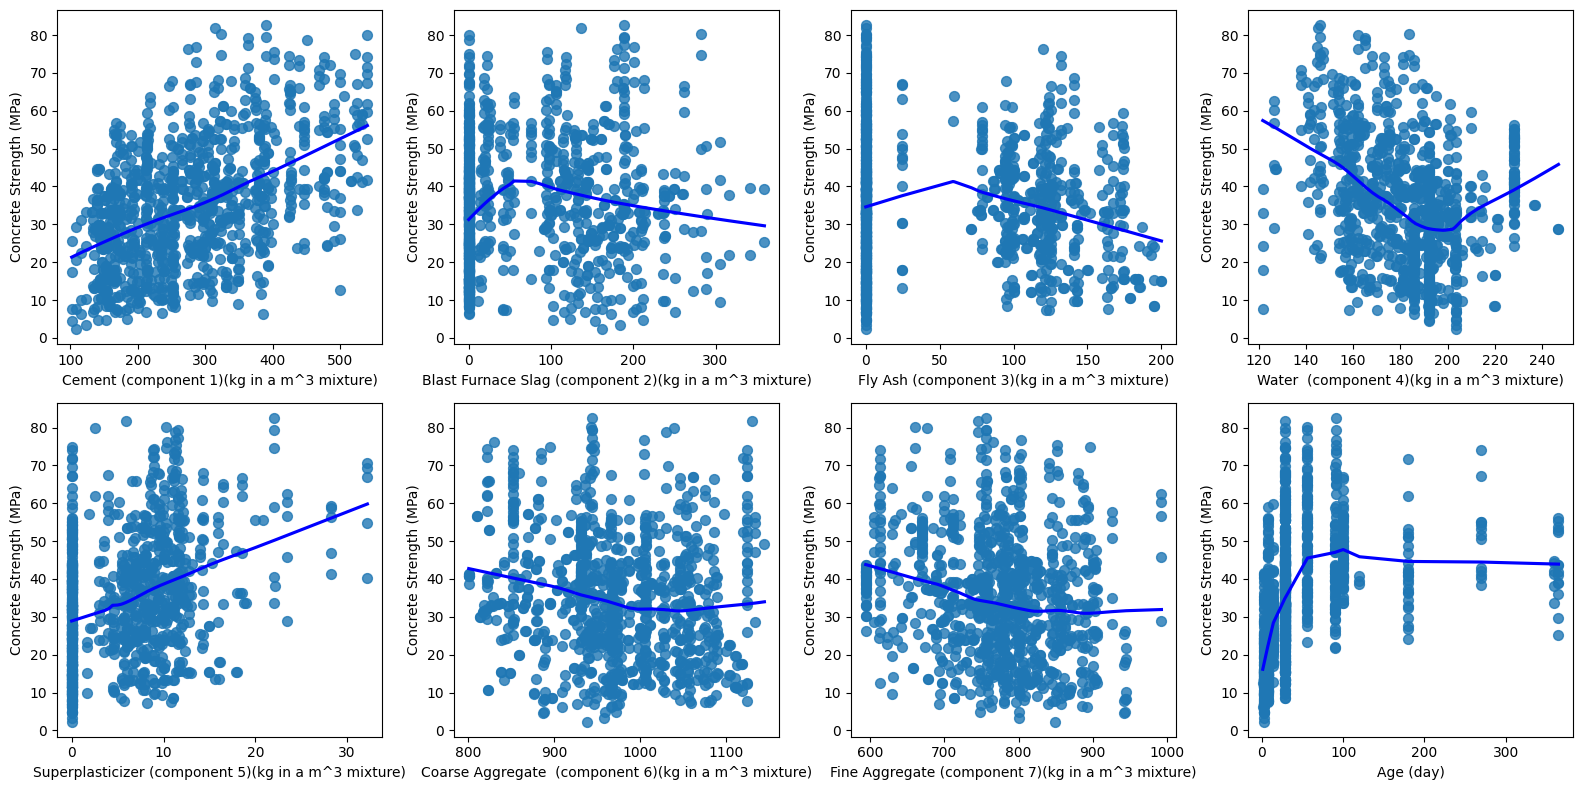

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()

for i, column in enumerate(concrete.columns):
    if column != concrete.columns[8]:
        sns.regplot(x=concrete[column], y=concrete[concrete.columns[8]], ax=axes[i], scatter_kws={'s': 50}, line_kws={'color': 'blue'}, lowess=True)
        axes[i].set_xlabel(column)
        axes[i].set_ylabel("Concrete Strength (MPa)")

plt.tight_layout()
plt.show()

We applied a LOESS curve of best fit to each plot to determine if any relationships appeared to follow a non-linear pattern. Somewhat surprisingly, most features exhibited mostly linear behavior for the relationship between themselves and concrete strength. The only features which showed apparant significant deviation from a non-linear pattern were the "water" feature and "age" feature, though the water feature's scatterplot is so varied that the curve of best fit does not appear to be a confident one, so a linear relationship may not be inappropriate. There are no features with highly linear relationships, though cement appears to be the most so. We also see several vertical lines present in our scatterplots, which occur when many samples are taken with the same value of a predictive feature. This happens when some value for a feature is considered a service standard. For example, slag, fly ash, and superplasticizer have many samples with 0 of the ingredient present, indicating that these features are not necessary to create concrete, but are just additives. Age is the clearest example of this, where nearly all samples fall into specific ages, with obvious checkpoints at a half a year and a full year for example. Water had a large amount of leverage near the value $x=228.0$, as there were many samples taken with that amount. This likely implies that 228kg/m^3 of water is a common service standard for concrete, and explains the spontaneous deviation of our curve of best fit that tried to account for these concrete samples.

Age presents a non-linear relationship from the curve of best fit, yet the variance is still high and a somewhat linear relationship may still not be poor assumption. However, we want our model to be somewhat generalizable and we know that clear that we should not expect our concrete to indefinitely become stronger over time, so we will assume our age curve of best fit is approximately correct to more realistically account for age in our model. The curve indicates rapid growth followed by stagnation after a certain point, so a couple reasonable transformations of our variable could be $\text{log}(x)$ or $\sqrt{x}$. The logarithm tends to occur in nature more often due to its relation to exponential growth/decay, so we will apply that transformation.

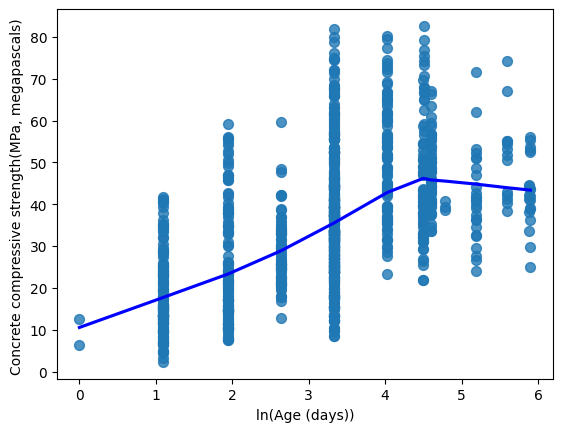

In [ ]:
pd.options.mode.chained_assignment = None # Disabling a warning about working with a slice of our dataframe, but we are intending to modify the dataframe so we are okay with this.
concrete["Age (day)"]=np.log(concrete["Age (day)"]) # Replace age with ln(age)
concrete.rename(columns={'Age (day)': 'ln(Age (days))'}, inplace=True)
sns.regplot(x=concrete["ln(Age (days))"], y=concrete[concrete.columns[8]], scatter_kws={'s': 50}, line_kws={'color': 'blue'}, lowess=True) # Check curve of best fit on transformed feature
plt.show()

Our LOESS curve of best fit more closely resembles a straight line now, giving us a better indication of a linear relationship between the logarithm of the concrete's setting time being proportionate to the concretes strength. We should note that we also tested the $\sqrt{x}$ transformation and various other power transformations, but the logarithm transform was the one to give the best result. We still see a bit of tapering off near the end, but we do not expect large values of $\text{log}(x)$ to be realistically chosen for our model ($x=9$, for example, implies we are setting our concrete for over 22 years before we implement it!).

Now that our data has been transformed and it appears that all of our features follow a somewhat linear relationship, we are ready to put forward our model.

In [ ]:
X = concrete.drop(["Concrete compressive strength(MPa, megapascals) "], axis=1)
y = concrete['Concrete compressive strength(MPa, megapascals) ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000) # Train/test split
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
np.set_printoptions(suppress=True) # Depreciated function used, just ignoring the warning.
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # These lines are simply here to prevent our coefficients and data from being presented in scientific notation, for readability
print("Coefficients:\n")
for i in range(len(X.columns)):
    print(f"{X.columns[i]:<60}{model.coef_[i]:>20.5f}")
print("-----------------------------")
print(f"Intercept: {model.intercept_:.5f}")

Coefficients:

Cement (component 1)(kg in a m^3 mixture)                                0.12872
Blast Furnace Slag (component 2)(kg in a m^3 mixture)                    0.10813
Fly Ash (component 3)(kg in a m^3 mixture)                               0.09255
Water  (component 4)(kg in a m^3 mixture)                               -0.15669
Superplasticizer (component 5)(kg in a m^3 mixture)                      0.03836
Coarse Aggregate  (component 6)(kg in a m^3 mixture)                     0.02370
Fine Aggregate (component 7)(kg in a m^3 mixture)                        0.02761
ln(Age (days))                                                           8.71173
-----------------------------
Intercept: -57.12014


This table tells us that our model is:

$$y = -57.12+0.1287x_1+0.1081x_2+0.0926x_3-0.1567x_4+0.0384x_5+0.0237x_6+0.0276x_7+8.7117x_8.$$

Before evaluating the performance of our model, we test if our assumptions about the error terms are met, otherwise our model is not reasonable to use regardless of its performance metrics.

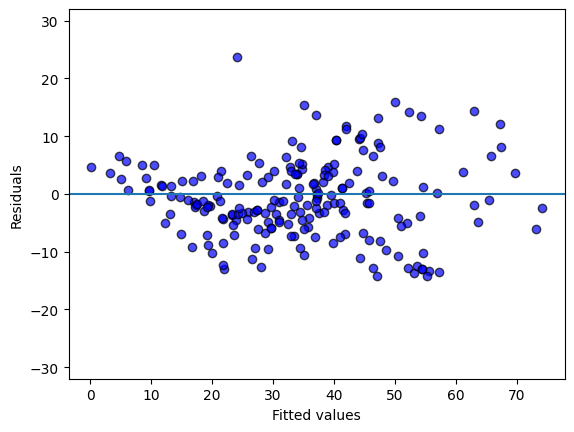

In [ ]:
# Making predictions from our test split
y_pred = model.predict(X_test)
residuals = y_test - y_pred

plt.scatter(y_pred, residuals, color='blue', edgecolor='k', alpha=0.7)
plt.ylim(-32,32)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.axhline(y=0)
plt.show()

Our first residual plot shows no particular obvious patterns, so we can rule out correlated error terms. Most of the residuals seem to fall in a in a band about the x-axis, so there is not a strong reason to believe that we have non-constant variance. It is reasonable to assume that our error terms are independant and have constant variance, we now have to test if they are normally distributed via a quantile-quantile plot.

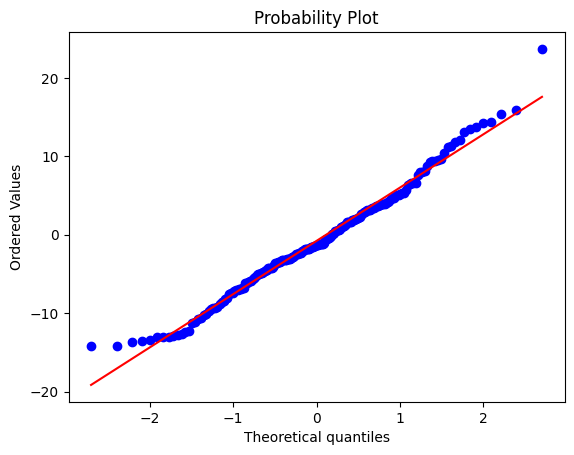

In [ ]:
# QQ plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

The QQ plot shows our residuals mostly align with what we would expect normally distributed random variables to be, so it is reasonable to assume that all of our assumptions about our error terms were correct and so a linear model is not inappropriate to use. We can now check the performance of our model.

In [ ]:
# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2_adj = 1-(1-r2)*(1005-1)/(1005-8-1) # Known formula for adjusted R^2 when R^2 is known

print(f"Mean Squared Error: {mse:.5f}")
print(f"Mean Absolute Error: {mae:.5f}")
print(f"R-squared: {r2:.5f}")
print(f"Adjusted R-squared: {r2_adj:.5f}")

Mean Squared Error: 46.44529
Mean Absolute Error: 5.37665
R-squared: 0.82810
Adjusted R-squared: 0.82672


Our model explains about 82.7% of the variance that accounts for the strength of concrete. Our model's predictions tend to be off by an average of $\pm5.38$, and the compressive strength of our concrete mixtures range from $0$ to $90$, so model is relatively accurate.

We can draw conclusions from the model itself. We will obtain our feature importances by multiply the coefficients associated with each feature by the average value of each feature to account for the scale. We do this because we may find ourselves with a small coefficient, but the amount of a feature present in a cement mix is orders of magnitudes higher than other features, and its influence may be understated if we were to only look at coefficients alone.

In [ ]:
print("Feature importances:\n")
for i in range(len(X.columns)):
    print(f"{X.columns[i]:<60}{model.coef_[i]*np.mean(X[X.columns[i]]):>20.5f}")

Feature importances:

Cement (component 1)(kg in a m^3 mixture)                               35.86589
Blast Furnace Slag (component 2)(kg in a m^3 mixture)                    7.78987
Fly Ash (component 3)(kg in a m^3 mixture)                               5.13950
Water  (component 4)(kg in a m^3 mixture)                              -28.52970
Superplasticizer (component 5)(kg in a m^3 mixture)                      0.23136
Coarse Aggregate  (component 6)(kg in a m^3 mixture)                    23.09141
Fine Aggregate (component 7)(kg in a m^3 mixture)                       21.33544
ln(Age (days))                                                          27.60304


From our feature importances chart, we can make some inferences. First, water is the only ingredient in our model that degrades the strength of our concrete, and it does so by a fairly large margin. This implies that superplasticizer, which we noticed earlier from the correlation matrix was used to reduce the amount of water used in our concrete, is highly effective at increasing the strength of our concrete. Superplasticizer itself is not very impactful (lowest positive feature importance), but its presence in a recipe reduces the amount of water we use as well as allows the density of our concrete to be filled with better performing ingredients. Cement, as we also predicted earlier, showed the most importance for determining our concrete's strength. Both types of aggregate followed close after, while slag and fly ash did not impact concrete strength relatively as much.

It should be noted that our age feature had the second highest feature importance, yet we were actually only considering the logarithm of the total time the concrete was left to settle. We need to take this into account when considering what this means for feature importance. The first few units of ln(Age (days)) eclapse relatively fast, while each successive unit occurs very slowly. (For example, going from 1 to 2 takes 4.67 days, but going from 6 to 7 takes 255 days). Considering the ease of increasing our ln(Age (days)) value initially, this implies that we should always try to let our concrete settle at least a while before determining our concretes effective compressive strength. Our original scatterplot before the logarithm transformation implies that a reasonable amount of time to wait before our concrete does not appear to get noticably stronger occurs at around 100 days of settling, though requirements for settling may depend on the nature of the recipe.

There may be logistic issues that prevent us from simply maximizing our ratios based on our feature importance. The naive conclusion for optimal concrete strength based on our model would be just to make it out of 100% cement and let it sit for a year. Of course, this cannot be the case since cement is a powder and does not have the qualities that we want in cement (pourable, rigid material when dried). Our model *does* however show us which materials we would want to maximize in our concrete formula if possible. Water is likely a necessity for constructing concrete, but minimizing it through additives such as superplasticizer prove to be an effective way to strengthen the concrete. Ash and slag do not appear to be necessary for concrete (they appear in large amounts of samples with a value of 0 according to our scatterplots), but they may exist as a way to reduce the presence of water, or are applied due to budget concerns since ash and slag are cheap (fly ash and furnace slag are actually byproducts, implying that they may only exist in concrete as impurities, and while they may technically improve the strength, it would be more ideal for the amounts of these materials present to be cement and providing a more pure sample of concrete).

## Conclusion

Our model provided us a reasonable estimate of concrete's compressive strength based on the contents in the mixture of the concrete and its setting time. A linear relationship to strength was present in all materials, while time scaled approximately logarithmically with strength. All features were relevant in our dataset, and no large degrees of multicollinearity were found. We achieved an adjusted $R^2$ of $0.827$, therefore accounting for the vast majority of variance in predicting our concrete's compressive strength, while our MAE was approximately 5.38, indicating our actual errors did not tend to be egregiously far off of the actual strength of sampled concrete.

The predictive value of our model for finding the strongest possible formula for concrete is questionable due to logistical concerns with how concrete is created, since some materials may be poor additions to concrete in terms of improving compressive strength, but necessary for other reasons such as making the material viscious. Feature importances derived from our model did outline the ideal materials present in concrete, which implied some of the strongest concrete would have a low ratio of water content and a high ratio of cement content. Our correlation matrix showed us that some additives exist to allow our concrete to minimize water content, such as superplasticizer, which aligns with the real-world practice. Our model and findings also showed that concrete assuredly requires an appropriate amount of setting time before a good compressive strength rating can be assured, though there was diminishing returns with letting concrete set for an extended period of time.

We are assuming that cost is not a limiting factor, but it is possible that the best recipe for concrete may require a large amount of expensive material or a process that is difficult to perform in practice. Fly ash and blast furnace slag are byproducts that may appear in concrete mixtures, and keeping the concrete mixture free of them and with cement in their place may be a difficult or costly task, and moderately strong concrete may be sufficient in most circumstances, so maximizing strength alone in concrete production is not the only factor worth considering. Another model could be created to improve on this model by incorporating cost of materials and production, which may be a new target or another predicitve feature.

Improving concrete strength is important for maximizing the durability and longevity, as well as potential for the material to be used in more problematic projects while ensuring the final results are safe and reliable. Discovering which materials and practices can be used to maximize strength would be benefical to the world of architecture and engineering as a whole, but we would be remiss not to point out the realistic boundaries in play when creating materials, and that strength is not the only relevant feature in a material when things like cost, environmental impact, and practicality can heavily factor into a material producers choice of concrete formula.

---
---
